# Classical Mechanics I (PHYS 311)
## Studio 5

*Name:* Connor Haskell

*Date:* 9/22/2024

## Introduction

We're going to run through an example of the so-called Higgs potential -- a critical element of our modern theory of particles. And soon, we'll use these tools to descibe the Higgs boson mathematically.

But the fundamental math we're doing here is important for all mechanics, solid state physics, particle physics, and even down to the fundamental way machine learning / artificial intelligence works.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this week's reading and lecture, we'll learn that for conservative forces, that force is actually a consequence of a some potential.

A potential is usually a *scalar field*. For every point in your space, there is a number associated with that potential. (Let's assume for now that it's a real number... but in general, a complex scalar is also a scalar.)

$$V(\vec{r})\in \mathcal{R}$$

The force $\vec{F}$ felt by a particle in that potential $V$ is given by:

$$\vec{F}(\vec{r}) = -\nabla V(\vec{r})$$

The *gradient* operator is denoted by $\nabla$. This symbol is called "grad", "del", or sometimes "nabla". But notice that V is scalar values, while F needs to be vector valued! **So the gradient operator turns scalar fields to vector fields.**

The gradient is just the spatial slope. In one dimension, it's just the derivative. If you're on a surface, it tells you how steep it is there, and in what direction it is steepest.

[This figure from Wikipedia](https://en.wikipedia.org/wiki/Gradient#/media/File:3d-gradient-cos.svg) is a nice illustration of this. There is a function $f(x,y)$ where for every $x$ and $y$ value, it gives a value (that is drawn as the height). The gradient of this function $\nabla f(x,y)$ is shown in blue arrows. For every value of $x$ and $y$, $\nabla f$ has a vector whose magnitude is the slope, and direction shows you where "uphill" is.

In one dimension ($x$), the gradient is simple. It's basically $\hat{x}\frac{d}{dx}$. 

$$\nabla f(x) = \frac{df}{dx}\hat{x}$$

It's the derivative with respect to x, scaling the x unit vector. Let's play with this a little...


## 1D Gradient

Let's try plotting the function

$$V(x)=-50x^2+x^4$$

on the interval of x=[-7,7]. Create a `linspace` on that range, make a **python function** that represents the function $V$, and then plot that function as a function of that linspace.

[ -49. -504. -625. -544. -369. -184.  -49.    0.  -49. -184. -369. -544.
 -625. -504.  -49.]
[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


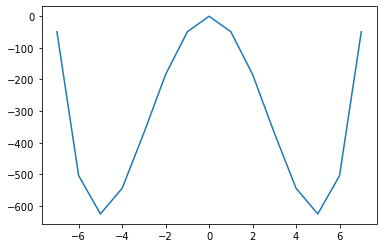

In [2]:
x_array = linspace(-7,7,15)

def vofx(x):
    return -50*x**2 + x**4

V_array = vofx(x_array)
print(V_array)
print(x_array)

plot(x_array, V_array)


Now let's use a built in function to compute the gradient from numpy, called `gradient()`. Try out a `?gradient` to read the documentation.

In [4]:
?gradient
gradv = gradient(V_array)
print(gradv)

[-455. -288.  -20.  128.  180.  160.   92.    0.  -92. -160. -180. -128.
   20.  288.  455.]


Plot the negative gradient by instead of plotting `V(x_array)`, plot `-gradient(V(x_array))`. (Of course, substitute whatever you called your linspace and your function.) Comment on how many times the negative gradient crosses zero and where those points happen -- a visual inspection is fine.

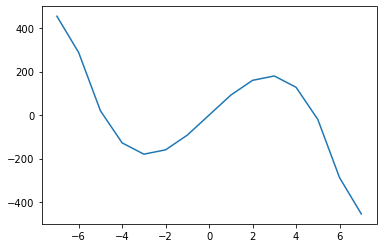

In [5]:
plot(x_array, -gradv)
 

**EC(+0.5): Plot both the function and its negative gradient on the same plot. Make a legend for this plot, and properly label the negative gradient as $-\nabla V(x)$. Look up how to use latex equations in matplotlib. **

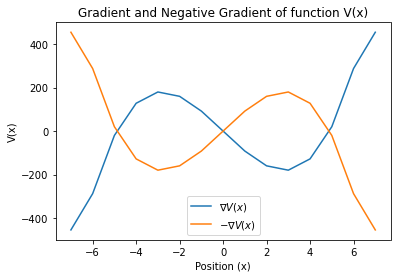

In [6]:
plot(x_array, gradv, label=r'$\nabla V (x)$')
plot(x_array, -gradv, label=r'$-\nabla V (x)$')
xlabel("Position (x)")
ylabel("V(x)")
title("Gradient and Negative Gradient of function V(x)")
legend()
show()

## 2D Gradient

Let's expand this a bit and go to 2D! Let's consider the same function but replacing $x$ with a polar coordinate $r$.

$$V(\vec{r}) = -50 |\vec{r}|^2 + |\vec{r}|^4$$

To plot this, we'll need to write a new function that takes in the X and Y components as inputs. `V2d(x,y)`. So you'll then need to calculate the radius $r$, and then return the (scalar) value of the potential V. (i.e. it still only returns one number per point in space.) Define that below.

In [7]:
def V2d(x,y):
    r = sqrt(y**2 + x**2)
    return -50*r**2 + r**4

We now need two linspaces. One to represent x and one to represent y. Go ahead and make those each between -5 and 5, but let's try to limit the number of steps to be 20 this time (to make some things easier later).

And then we need to create a `meshgrid` (again, look at the documentation!) out of them. To create this, you'll do something like:

`X,Y = meshgrid(x_array,y_array)`

Once you have `X` and `Y` defined, you can hand these to your `V2d` function to produce a list of `Z` values. Store the output of your `V2d` function as an object called `Z`.

To see a plot, simply run `pcolormesh(X,Y,Z)`. After you do that, you can just execute `colorbar()` which will create a color scale for you to understand what you're looking at.

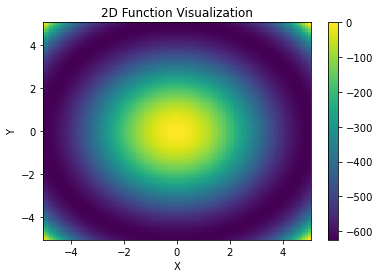

In [8]:
x_array = linspace(-5,5,100)
y_array = linspace(-5,5,100)
X,Y = meshgrid(x_array, y_array)

Z = V2d(X,Y)

pcolormesh(X, Y, Z, shading='auto')
colorbar()
xlabel("X")
ylabel("Y")
title("2D Function Visualization")
show()

Comment on the plot you got above here:







Now, let's do it! Let's take the gradient of this 2D potential! Now the output of the gradient will be a **vector field**. So for every point in this 2D space, it'll give a 2D vector.

In 2 dimensions, the gradient is:

$$\nabla f(x,y) = \hat{x} \frac{\partial f}{\partial x} + \hat{y}\frac{\partial f}{\partial y}$$

If you haven't seen this notation before, $\frac{\partial f}{\partial x}$ is the *partial* derivative of $f$ with respect to $x$. This means, let's ignore the other dimensions and ask the question -- how does my function change as a function of just $x$. This creeps in now that we're starting to play with multi-dimensional problems.

This can be generalized into any N-dimensional gradient. 

$$\nabla f(x_1,x_2,...,x_N) = \sum_i^N \hat{x_i} \frac{\partial f}{\partial x_i}$$

(Aside: This is a foundational tool in machine learning, where you look at the "gradient descent" of a hyper-surface (high N-dimensional surface) that shows the performance of the network as a function of all of the parameters of the network. Then the "learning" is about using the gradient to figure out how to change the parameters to improve the performance score.)

This is all hard to visualize. But in 2D, it's not so bad. For this, we often will super shrink down the length of the vectors into what's called a quiver plot (it has lots of arrows. get it?). That way you can understand the general behaviors of the vector field, even if you can't tell the overall magnitude of the vectors easily.

Let's first get the gradient of this potential. For every value of `Z`, we'll get a 2D vector out of the `gradient` function now.

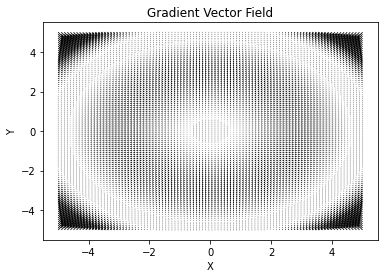

In [9]:
# For each point in space, we'll get a two-component vector out (u,v).

# It's a bit counter-intuitive, but the u (the x-component) will be
# on the second axis (nested two levels deep) of the Z object.
# And the v will be on the first axis (the top level array)
# This is confusing so I've just given you the answer here:
u=-gradient(Z,axis=1)
v=-gradient(Z,axis=0)


# Now you'll hand them to the function quiver. Here:

plt.quiver(X, Y, u, v)
xlabel("X")
ylabel("Y")
title("Gradient Vector Field")

show()

# Play with it until you can see the arrows of the vector field
# ... like in the blue arrows on the wikipedia example.

# Make sure to also make a version where you can see which direction the
# arrows point near the center. (Hint: Try playing with the x and y
# linspaces to zoom in, and/or look up the scale parameter of quiver().)

You're here! You're looking at what could be considered a force field for the Higgs potential. Comment on the behavior of the "force field" you've calculated here.

We'll play with this a bit more next time!

## EC(+1.0):

Make a 3D quiver plot showing the gradient vector field for a 3D analog of this same function where polar $r$ is replaced by spherical polar $r$ in 3D. Google is your friend for this.

